<a href="https://colab.research.google.com/github/glenpaulsmith/I-dont-know/blob/main/Weather_prediction_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/IE0005/open-meteo-23.23N77.45E495m.csv'

# create pandas dataframe
df = pd.read_csv(data_path,skiprows = 2)

# remove spaces on the column
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

# print out sample dataset
print(len(df))
df.head()

210384


,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),rain (mm),cloud_cover (%),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_direction_10m (°),direct_radiation (W/m²)
0,2000-01-01T00:00,13.4,57,5.2,0.0,0.0,0,0.04,10.3,61,0.0
1,2000-01-01T01:00,12.8,61,5.5,0.0,0.0,0,0.03,10.2,67,0.0
2,2000-01-01T02:00,12.2,65,5.8,0.0,0.0,0,0.03,9.9,71,0.0
3,2000-01-01T03:00,11.7,68,5.9,0.0,0.0,0,0.02,8.9,69,0.0
4,2000-01-01T04:00,11.2,71,6.1,0.0,0.0,0,0.02,9.0,67,0.0


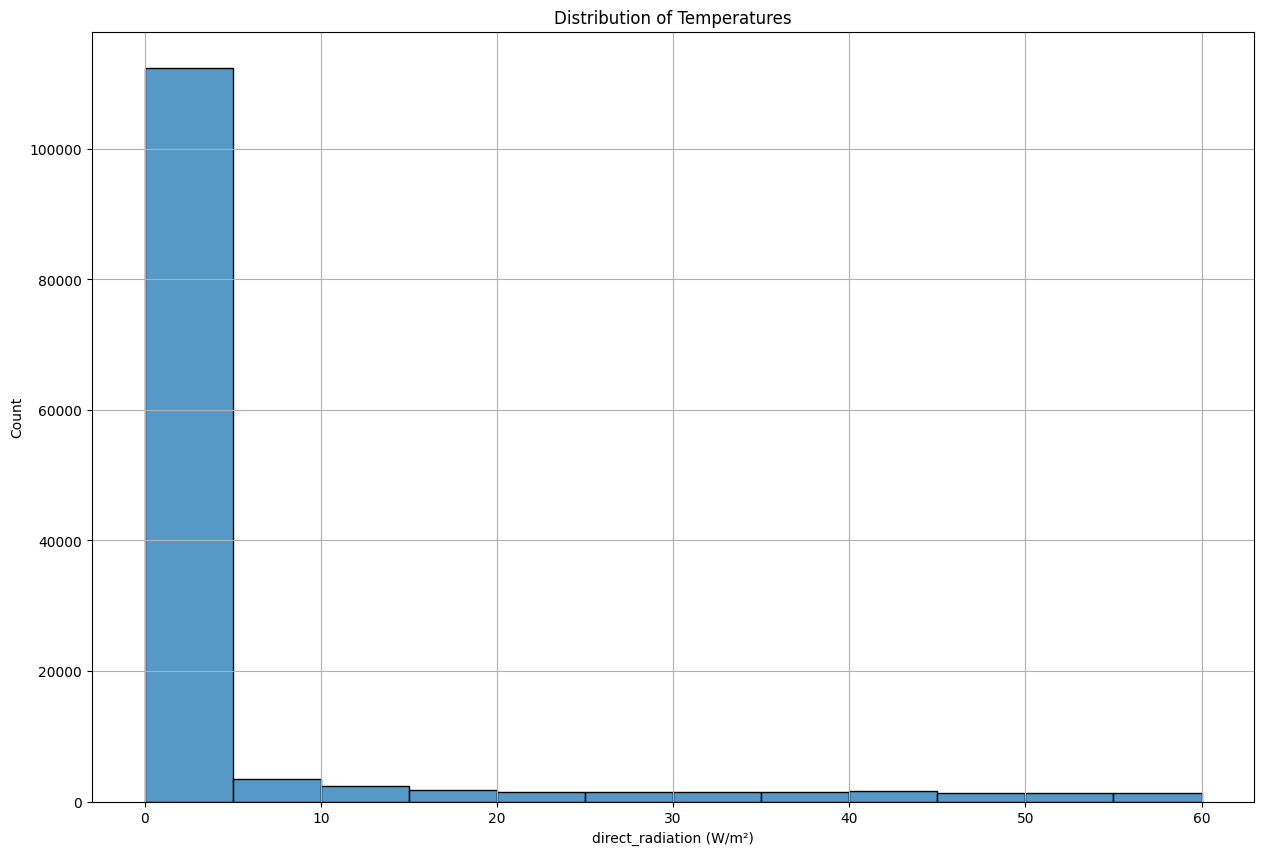

In [ ]:
# plot to see the temperature varience
plt.figure(figsize=(15, 10))
sns.histplot(df['direct_radiation (W/m²)'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [ ]:
# set data index as datetime column
df.index = pd.to_datetime(df.time)

# filter the columns by only the required_columns
required_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'rain (mm)','cloud_cover (%)','et0_fao_evapotranspiration (mm)', 'wind_speed_10m (km/h)', 'wind_direction_10m (°)', 'direct_radiation (W/m²)']
df = df[required_cols]
df.head()

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),rain (mm),cloud_cover (%),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_direction_10m (°),direct_radiation (W/m²)
time,,,,,,,,,,
2000-01-01 00:00:00,13.4,57,5.2,0.0,0.0,0,0.04,10.3,61,0.0
2000-01-01 01:00:00,12.8,61,5.5,0.0,0.0,0,0.03,10.2,67,0.0
2000-01-01 02:00:00,12.2,65,5.8,0.0,0.0,0,0.03,9.9,71,0.0
2000-01-01 03:00:00,11.7,68,5.9,0.0,0.0,0,0.02,8.9,69,0.0
2000-01-01 04:00:00,11.2,71,6.1,0.0,0.0,0,0.02,9.0,67,0.0


In [ ]:
df_final = df.resample('D').mean()
df_final.head()

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),rain (mm),cloud_cover (%),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_direction_10m (°),direct_radiation (W/m²)
time,,,,,,,,,,
2000-01-01,16.925000,49.541667,5.337500,0.0,0.0,0.000000,0.154167,8.295833,61.625000,162.458333
2000-01-02,16.529167,50.125000,4.883333,0.0,0.0,0.000000,0.152500,8.170833,57.000000,163.041667
2000-01-03,15.708333,52.208333,4.779167,0.0,0.0,0.000000,0.153333,8.508333,79.666667,164.875000
2000-01-04,15.512500,48.125000,3.645833,0.0,0.0,0.000000,0.152500,7.904167,69.833333,165.666667
2000-01-05,15.783333,48.041667,3.920833,0.0,0.0,3.791667,0.151250,7.962500,69.125000,159.708333


In [ ]:
df_final.isna().sum()

temperature_2m (°C)                0
relative_humidity_2m (%)           0
dew_point_2m (°C)                  0
precipitation (mm)                 0
rain (mm)                          0
cloud_cover (%)                    0
et0_fao_evapotranspiration (mm)    0
wind_speed_10m (km/h)              0
wind_direction_10m (°)             0
direct_radiation (W/m²)            0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_final)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(df_final.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][9]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)


Train X shape: (7004, 10, 10)
Train Y shape: (7004,)
Test X shape: (1752, 10, 10)
Test Y shape: (1752,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 10, 128)           71168     
                                                                 
 dropout_15 (Dropout)        (None, 10, 128)           0         
                                                                 
 lstm_16 (LSTM)              (None, 10, 64)            49408     
                                                                 
 dropout_16 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/IE0005/best_model_weights.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
88/88 [==============================] - ETA: 0s - loss: 0.0461

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 7s 23ms/step - loss: 0.0461 - val_loss: 0.0203
Epoch 2/100
88/88 [==============================] - 1s 9ms/step - loss: 0.0259 - val_loss: 0.0172
Epoch 3/100
88/88 [==============================] - 1s 12ms/step - loss: 0.0235 - val_loss: 0.0165
Epoch 4/100
88/88 [==============================] - 1s 12ms/step - loss: 0.0222 - val_loss: 0.0152
Epoch 5/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0199 - val_loss: 0.0145
Epoch 6/100
88/88 [==============================] - 1s 8ms/step - loss: 0.0182 - val_loss: 0.0141
Epoch 7/100
88/88 [==============================] - 1s 9ms/step - loss: 0.0169 - val_loss: 0.0116
Epoch 8/100
88/88 [==============================] - 1s 9ms/step - loss: 0.0160 - val_loss: 0.0120
Epoch 9/100
88/88 [==============================] - 1s 9ms/step - loss: 0.0152 - val_loss: 0.0108
Epoch 10/100
88/88 [==============================] - 1s 8ms/step - loss: 0.0144 - val_loss: 0.0109
Epoch 11/100
88/8

In [ ]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('/content/drive/MyDrive/IE0005/best_model_weights.h5')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

55/55 [==============================] - 1s 3ms/step - loss: 0.0138
Test Loss: 0.013753825798630714


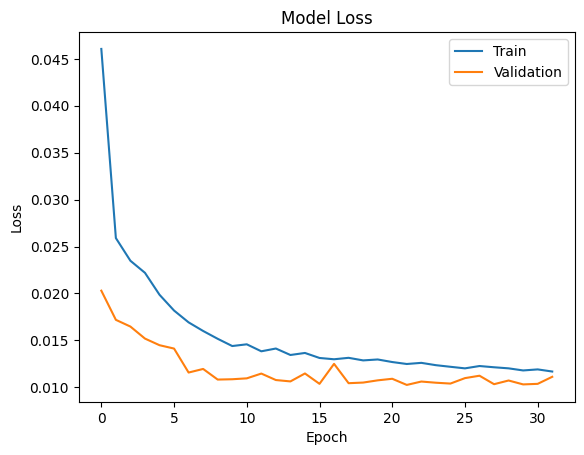

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
r = r2_score(test_y, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance (R^2) \t:", r)

55/55 [==============================] - 1s 3ms/step
Mean Absolute Error (MAE): 0.08632775126632235
Mean Squared Error (MSE): 0.013753825911351759
Root Mean Squared Error (RMSE): 0.11727670660174491
Explained Variance (R^2) 	: 0.6925258277716364


In [ ]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,9]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 10, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,9]

55/55 [==============================] - 0s 3ms/step


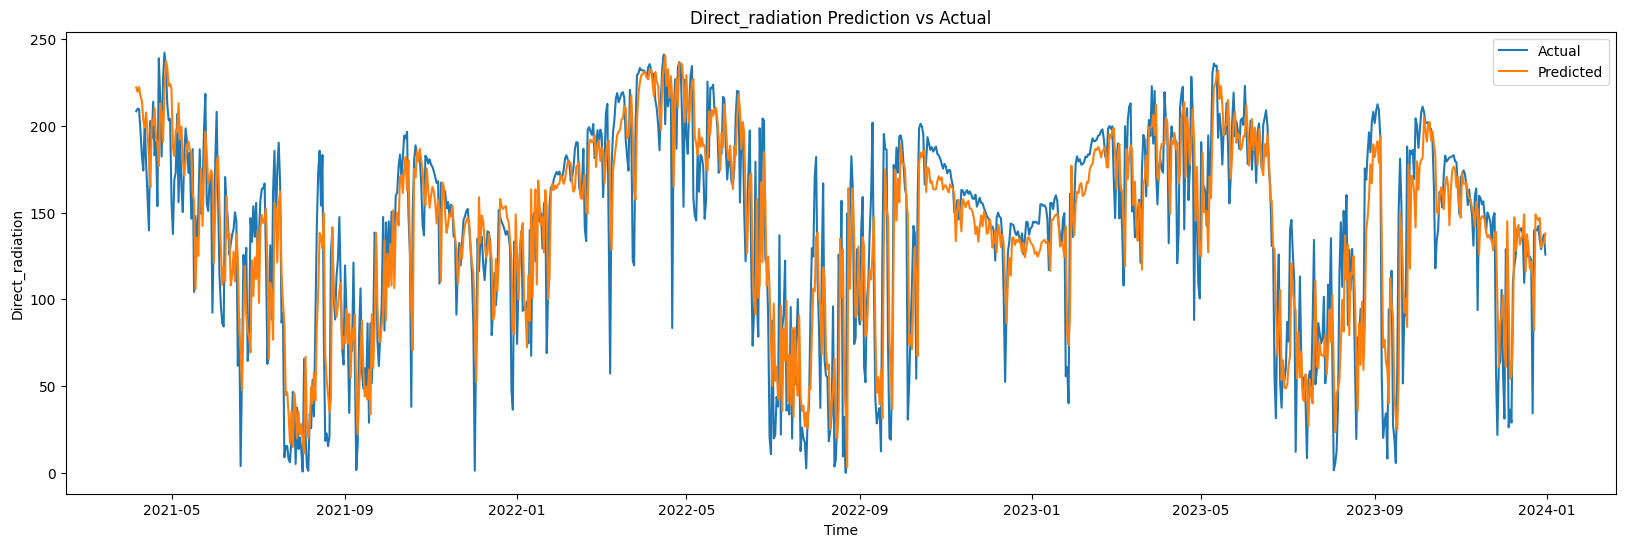

In [ ]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(20, 6))
plt.plot(df_final.index[-1000:], true_temp[-1000:], label='Actual')
plt.plot(df_final.index[-1000:], predicted_temp[-1000:], label='Predicted')
plt.title('Direct_radiation Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Direct_radiation')
plt.legend()
plt.show()